In [1]:
import import_ipynb
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Loading Data:

In [2]:
from P01_Pre_Processing import matches
from P01_Pre_Processing import deliveries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [3]:
matches.head()

,Id,Season,City,Date,Match_Type,Player_Of_Match,Venue,Team1,Team2,Toss_Winner,Toss_Decision,Winner,Result,Result_Margin,Target_Runs,Target_Overs,Super_Over,Method,Umpire1,Umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Field,Kolkata Knight Riders,Runs,140,223,20,N,Normal,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Chennai Super Kings,Chennai Super Kings,Bat,Chennai Super Kings,Runs,33,241,20,N,Normal,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,Bat,Delhi Capitals,Wickets,9,130,20,N,Normal,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Bat,Royal Challengers Bangalore,Wickets,5,166,20,N,Normal,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,Bat,Kolkata Knight Riders,Wickets,5,111,20,N,Normal,BF Bowden,K Hariharan


In [4]:
deliveries.head()

,Match_Id,Inning,Batting_Team,Bowling_Team,Over,Ball,Batter,Bowler,Non_Striker,Batsman_Runs,Extra_Runs,Total_Runs,Extras_Type,Is_Wicket,Player_Dismissed,Dismissal_Kind,Fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,Legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,Wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


# Matches Per Season

In [5]:
matches_per_season = matches['Season'].value_counts().sort_index()
    
colors = px.colors.qualitative.Safe
color_list = [colors[i % len(colors)] for i in range(len(matches_per_season))]

trace = go.Bar(
    x=matches_per_season.index,
    y=matches_per_season.values,
    text=matches_per_season.values,
    marker={'color': color_list}
)

layout = go.Layout(
    title="Matches Per Season",
    title_x =0.5,
    xaxis={'title': 'Season'},
    yaxis={'title': 'Number of Matches Played'}
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

# Most POTM Awards

In [6]:
top_20_POTM = matches['Player_Of_Match'].value_counts().iloc[:20].sort_values()

fig = px.bar(
    y=top_20_POTM.index,
    x=top_20_POTM.values,
    labels={'y': 'Player', 'x': 'POTM Awards'},
    color=top_20_POTM.index,
    text=top_20_POTM.values,
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(height=700, width=900, showlegend=False, title_text="Top 20 Players with Most POTM Awards", title_x=0.5)
fig.show()

# Top 20 Venues With Most Matches

In [7]:
top_20_venue = matches['Venue'].value_counts().iloc[:20].sort_values()
    
fig = px.bar(
    y=top_20_venue.index,
    x=top_20_venue.values,
    labels={'y': 'Venue', 'x': 'Total Matches Played'},
    color=top_20_venue.index,
    text=top_20_venue.values,
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(height=700, width=1200, showlegend=False, title_text="Top 20 Venues with Most Matches", title_x=0.5)
fig.show()

# Team With Most Match Wins

In [8]:
teams_total_wins = matches['Winner'].value_counts().iloc[:].sort_values()
    
fig = px.bar(
    y=teams_total_wins.index,
    x=teams_total_wins.values,
    labels={'y': 'Team', 'x': 'Total Matches Won'},
    color=teams_total_wins.index,
    text=teams_total_wins.values,
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(height=700, width=900, showlegend=False, title_text="Teams with Most Match Wins", title_x=0.5)
fig.show()

# Team With Most Toss Wins

In [9]:
teams_toss_win_count = matches['Toss_Winner'].value_counts().iloc[:].sort_values()

fig = px.bar(
    y=teams_toss_win_count.index,
    x=teams_toss_win_count.values,
    labels={'y': 'Team', 'x': 'Total Tosses Won'},
    color=teams_toss_win_count.index,
    text=teams_toss_win_count.values,
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(height=700, width=1200, showlegend=False, title_text="Toss Winners", title_x=0.5)
fig.show()

# Win Percentage of Team after Winning The Toss

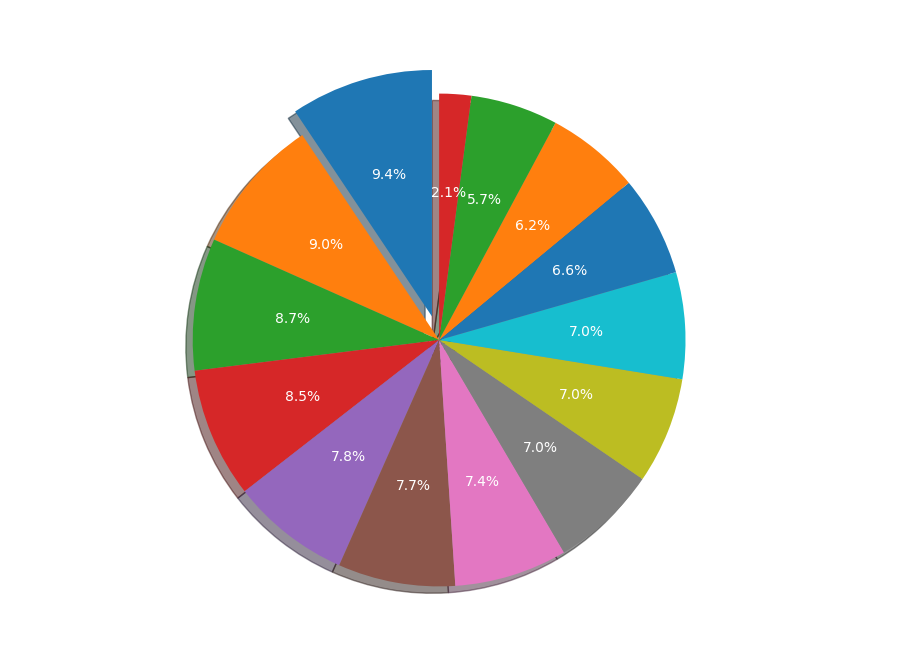


Overall Record:
Gujarat Lions                 67
Gujarat Titans                64
Rising Pune Supergiant        62
Chennai Super Kings           61
Kolkata Knight Riders         56
Mumbai Indians                55
Lucknow Super Giants          53
Kochi Tuskers Kerala          50
Royal Challengers Bangalore   50
Rajasthan Royals              50
Delhi Capitals                47
Sunrisers Hyderabad           44
Punjab Kings                  41
Pune Warriors India           15
Name: count, dtype: float64


In [10]:
win_percentage_after_toss = round(
    (matches[matches['Toss_Winner'] == matches['Winner']]['Winner'].value_counts() / 
        matches['Toss_Winner'].value_counts()) * 100
).sort_values(ascending=False)

explode = [0.1] + [0] * (len(win_percentage_after_toss) - 1)

plt.figure(figsize=(15, 8))
plt.rcParams.update({'text.color': "white", 'axes.labelcolor': "black"})

win_percentage_after_toss.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)

plt.ylabel('')
plt.title('Win Percentage of Team after Winning The Toss')
plt.show()

print("\nOverall Record:")
print(win_percentage_after_toss)

# Teams Winning Both Toss and Matches

In [11]:
toss_Match_winner = matches[matches['Toss_Winner'] == matches['Winner']]['Winner'].value_counts()

colors = px.colors.qualitative.Safe
color_list = colors[:len(toss_Match_winner)]

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=toss_Match_winner.index,
        y=toss_Match_winner.values,
        text=toss_Match_winner.values,
        textposition='outside',
        marker_color=color_list,
    )
)

fig.update_layout(
    title="Teams Winning Both Toss and Matches",
    xaxis_title="Teams",
    yaxis_title="Total Matches Won",
    xaxis=dict(tickangle=-45),
    height=800,
    width=1200,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)

fig.show()

print("\nRecords:")
print(toss_Match_winner)


Records:
Winner
Mumbai Indians                 78
Chennai Super Kings            75
Kolkata Knight Riders          68
Delhi Capitals                 61
Royal Challengers Bangalore    61
Rajasthan Royals               60
Sunrisers Hyderabad            57
Punjab Kings                   45
Gujarat Titans                 14
Gujarat Lions                  10
Lucknow Super Giants           10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            4
Pune Warriors India             3
Name: count, dtype: int64


# Top 20 Players With Most Runs

In [12]:
top_20_run_scorer = deliveries.groupby('Batter')['Batsman_Runs'].sum().sort_values(ascending=False)[:20]

top_20_run_scorer_df = top_20_run_scorer.reset_index()
top_20_run_scorer_df.columns = ['Player', 'Runs']

fig = px.bar(
    top_20_run_scorer_df,
    x='Runs',
    y='Player',
    labels={'Player': 'Player', 'Runs': 'Total Runs'},
    color='Player',
    text='Runs',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(
    height=600,
    width=1000,
    yaxis_title='Player',
    xaxis_title='Total Runs',
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False,
    title_text="Top 20 Run Scorers in IPL History",
    title_x=0.5
)

fig.update_traces(textposition='outside')
fig.show()

# Most Expensive Bowlers

In [43]:
def plot_economy(data, title, threshold=10):
    bowler_stats = data.groupby('Bowler').agg(
        Total_Runs=('Total_Runs', 'sum'),
        Balls_Bowled=('Ball', 'count')
    ).reset_index()

    bowler_stats['Economy'] = bowler_stats['Total_Runs'] / (bowler_stats['Balls_Bowled'] / 6)

    matches_per_bowler = data.groupby('Bowler')['Match_Id'].nunique().reset_index(name='Matches')
    bowler_stats = bowler_stats.merge(matches_per_bowler, on='Bowler')

    bowler_stats = bowler_stats[bowler_stats['Matches'] >= threshold]

    bowler_stats = bowler_stats.sort_values('Economy', ascending=False).head(20)

    fig = px.bar(
        bowler_stats,
        x='Economy',
        y='Bowler',
        text=bowler_stats['Economy'].round(2),
        orientation='h',
        color='Bowler',
        color_discrete_sequence=px.colors.qualitative.Safe,
        title=title
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(
        height=700,
        width=1200,
        yaxis=dict(categoryorder='total ascending'),
        xaxis_title="Economy Rate (Runs per Over)",
        yaxis_title="Bowler",
        title_x=0.5,
        showlegend=False
    )

    fig.show()
    return bowler_stats


In [46]:
print("> Overall Most Expensive Bowlers (min 15 matches):")
overall_expensive = plot_economy(deliveries, "Overall Most Expensive Bowlers", threshold=20)
print(overall_expensive.head(10))

print("\n> Most Expensive Bowlers in 1st Over (min 15 matches):")
first_over = deliveries[deliveries['Over'] == 0]
first_expensive = plot_economy(first_over, "Most Expensive Bowlers in 1st Over", threshold=10)
print(first_expensive.head(10))

print("\n> Most Expensive Bowlers in 20th Over (min 15 matches):")
twenty_over = deliveries[deliveries['Over'] == 19]
twenty_expensive = plot_economy(twenty_over, "Most Expensive Bowlers in 20th Over", threshold=10)
print(twenty_expensive.head(10))

> Overall Most Expensive Bowlers (min 15 matches):


            Bowler  Total_Runs  Balls_Bowled  Economy  Matches
361        R Parag         307           181  10.1768       21
310   Mukesh Kumar         707           420     10.1       20
95     CJ Anderson         525           315       10       22
85    Basil Thampi         862           539  9.59555       25
239   Kartik Tyagi         720           458  9.43231       20
292     MP Stoinis        1300           831  9.38628       62
440      SM Curran        1924          1234  9.35494       58
43       AS Joseph         707           454  9.34361       22
98       CJ Jordan        1111           717  9.29707       34
462  Shahbaz Ahmed         850           549  9.28962       42

> Most Expensive Bowlers in 1st Over (min 15 matches):


             Bowler  Total_Runs  Balls_Bowled  Economy  Matches
74       GJ Maxwell         106            68  9.35294       11
238        VG Arora         102            67  9.13433       11
178   R Vinay Kumar         105            73  8.63014       12
209       SM Curran         113            79  8.58228       13
142       MM Sharma          99            79  7.51899       13
5          A Nortje          77            63  7.33333       10
97        JJ Bumrah          76            63   7.2381       10
29   Arshdeep Singh          83            70  7.11429       11
103       K Gowtham         108            92  7.04348       15
217       STR Binny         106            92  6.91304       15

> Most Expensive Bowlers in 20th Over (min 15 matches):


                Bowler  Total_Runs  Balls_Bowled  Economy  Matches
6             A Nortje         174            73  14.3014       12
55           CJ Jordan         145            64  13.5938       10
86           HH Pandya         174            78  13.3846       13
12            AB Dinda         276           124  13.3548       21
200          PP Chawla          98            46  12.7826       10
105         JD Unadkat         262           126  12.4762       22
154  M Prasidh Krishna         135            65  12.4615       11
184        NLTC Perera         136            67  12.1791       13
92            I Sharma         176            87  12.1379       14
116        JP Faulkner         192            97  11.8763       16


# Overwise Average Runs For Each Team

In [15]:
corr = deliveries.pivot_table(
    values='Total_Runs',
    index='Batting_Team',
    columns='Over',
    aggfunc='mean'
).fillna(0) * 6

for over in range(0, 20):
    if over not in corr.columns:
        corr[over] = 0

corr = corr[sorted(corr.columns)]
corr_transposed = corr.T

fig = px.imshow(
    corr_transposed,
    color_continuous_scale="viridis",
    labels=dict(x="Team", y="Over", color="Runs"),
    x=corr_transposed.columns,
    y=corr_transposed.index
)

fig.update_yaxes(tickvals=list(range(1, 21)), title_text='Overs', title_font_size=16)
fig.update_xaxes(title_text='Teams', title_font_size=16, tickangle=45)
fig.show()

# Toss Decision Based On Top Venues

In [16]:
top_venues = matches['Venue'].value_counts().head(15).index.to_list()
top_venues_matches = matches[matches['Venue'].isin(top_venues)]

top_venues_matches['venue_location'] = top_venues_matches['Venue'].astype(str) + ", " + top_venues_matches['City'].astype(str)

venue_toss_stats = top_venues_matches.groupby(['venue_location', 'Toss_Decision']).size().reset_index(name='count')
venue_toss_stats = venue_toss_stats.sort_values(by='count', ascending=False)

fig = px.bar(
    venue_toss_stats,
    x='venue_location',
    y='count',
    color='Toss_Decision',
    labels={'count': 'Count', 'venue_location': 'Venue and City'},
    color_discrete_sequence=px.colors.sequential.Viridis,
    barmode='group',
    text='count'
)

fig.update_layout(
    title_text='Toss Decision Based on Top Venues',
    xaxis_title='Venue and City',
    yaxis_title='Count',
    title_x=0.5,
    height=600,
    width=800,
    xaxis=dict(showgrid=False, tickangle=-45),
    yaxis=dict(showgrid=True),
    plot_bgcolor='rgba(0,0,0,0)',
    legend_title_text='Decision Taken'
)

fig.update_traces(textposition='outside')
fig.show()

print("\nVenue Toss Statistics:")
print(venue_toss_stats.sort_values(by='count', ascending=False))


C:\Users\kiran\AppData\Local\Temp\ipykernel_37628\261037978.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Venue Toss Statistics:
                                       venue_location Toss_Decision  count
33                           Wankhede Stadium, Mumbai         Field     88
11                              Eden Gardens, Kolkata         Field     63
13                   M Chinnaswamy Stadium, Bangalore         Field     57
1                         Arun Jaitley Stadium, Delhi         Field     54
16                    MA Chidambaram Stadium, Chennai           Bat     48
23  Punjab Cricket Association IS Bindra Stadium, ...         Field     44
25      Rajiv Gandhi International Stadium, Hyderabad         Field     42
17                    MA Chidambaram Stadium, Chennai         Field     37
0                         Arun Jaitley Stadium, Delhi           Bat     36
24      Rajiv Gandhi International Stadium, Hyderabad           Bat     35
27                     Sawai Mansingh Stadium, Jaipur         Field     32
19      Maharashtra Cricket Association Stadium, Pune         Field     31
1

# Average Runs By Teams In Last Over

In [25]:
last_over = deliveries[deliveries['Over'] == 19]
    
twenty_over_overs = last_over.groupby('Batting_Team').size().sort_values(ascending=False)/6
twenty_over_scores = (last_over.groupby('Batting_Team')['Total_Runs'].sum()/twenty_over_overs).sort_values(ascending=False)

twenty_over_scores = twenty_over_scores.round(2)

fig = px.bar(
    x=twenty_over_scores.values,
    y=twenty_over_scores.index,
    orientation='h',
    labels={'x': 'Total Runs', 'y': 'Teams'},
    color=twenty_over_scores.index,
    text=twenty_over_scores.values,
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(autorange="reversed", showgrid=False),
    xaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False,
    title='Total Runs Scored By Teams in Last Over',
    title_x=0.5
)

fig.show()

# Total Runs Scored By Teams In Last Over

In [18]:
last_over = deliveries[deliveries['Over'] == 19]

twenty_over_scores = last_over.groupby('Batting_Team')['Total_Runs'].sum().sort_values(ascending=False)

fig = px.bar(
    x=twenty_over_scores.values,
    y=twenty_over_scores.index,
    orientation='h',
    labels={'x': 'Total Runs', 'y': 'Teams'},
    color=twenty_over_scores.index,
    text=twenty_over_scores.values,
    color_discrete_sequence=px.colors.sequential.Viridis,
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(autorange="reversed", showgrid=False),
    xaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False
)

fig.show()

# Total Runs Scored in Each Season

In [19]:
matches['Season'] = matches['Season'].astype(str)
matches['Target_Runs'] = pd.to_numeric(matches['Target_Runs'], errors='coerce')

season_runs = matches.groupby('Season')['Target_Runs'].sum().reset_index()

fig = px.line(
    data_frame=season_runs,
    x='Season',
    y='Target_Runs',
    labels={'Target_Runs': 'Total Runs', 'Season': 'Season'},
    markers=True,
    text='Target_Runs'
)

fig.update_layout(
    title='Total Runs Per Season',
    title_x=0.5,
    xaxis_title='Season',
    yaxis_title='Total Runs',
    xaxis=dict(showgrid=False, tickangle=-45),
    yaxis=dict(showgrid=True),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.update_traces(textposition='top center', marker=dict(size=8), line=dict(width=2))
fig.show()

# Count of Matches By Different Umpires

In [20]:
umpires = pd.concat([matches['Umpire1'], matches['Umpire2']]).value_counts()
top_10_umpires = umpires.nlargest(10)

fig = px.bar(
    x=top_10_umpires.values,
    y=top_10_umpires.index,
    orientation='h',
    labels={'x': 'Matches Umpired', 'y': 'Umpire Name'},
    color=top_10_umpires.index,
    text=top_10_umpires.values,
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(autorange="reversed", showgrid=False),
    xaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False,
    title='Top 10 Umpires Based on Matches Umpired',
    title_x=0.5
)

fig.show()

# Teams with more than 200+ scores

In [21]:
runs = deliveries.groupby(['Match_Id', 'Inning', 'Batting_Team', 'Bowling_Team'])['Total_Runs'].sum().reset_index()
runs_over_200_df = runs[runs['Total_Runs'] > 200]
runs_over_200 = runs_over_200_df['Batting_Team'].value_counts()

fig = px.bar(
    x=runs_over_200.values,
    y=runs_over_200.index,
    orientation='h',
    labels={'x': 'Number of Instances', 'y': 'Teams'},
    text=runs_over_200.values,
    color=runs_over_200.index,
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(autorange="reversed", showgrid=False),
    xaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False,
    title='Most 200+ Runs Scored By Teams',
    title_x=0.5
)

fig.show()

# Lucky Venue For Teams

In [ ]:
teams = matches['Team1'].unique().tolist()

for team in teams:
    team_name = team
    lucky_venues = matches[matches['Winner'] == team_name]['Venue'].value_counts().nlargest(10)
    
    if len(lucky_venues) > 0:
        fig = px.pie(
            values=lucky_venues.values,
            names=lucky_venues.index,
            title=f'Win Percentage at Different Venues for {team_name}',
            color_discrete_sequence=['turquoise', 'lightblue', 'lightgreen', 'crimson', 'magenta', 'orange']
        )

        fig.update_traces(
            textposition='inside',
            textinfo='percent+label',
            pull=[0.1]*len(lucky_venues),
            showlegend=False
        )

        fig.update_layout(
            height=500,
            width=800,
            title_x=0.5,
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )

        fig.show()